# 1. BUSINESS UNDERSTANDING

With the rapid development of Artificial Intelligence (AI) in recent years, AI has been used in a variety of industries. Such as data mining, manufacturing, and financial services. By building the right models, humans can use AI to perform many tasks that once required complex human intervention. One of the most notable applications is the use of AI in healthcare.

Pneumonia is a serious lung infection that can affect people of all ages, but it is especially dangerous for the elderly, young children, and those with weakened immune systems. The traditional method for diagnosing pneumonia is through a physical examination and laboratory tests, but these methods are time-consuming and frequently require multiple visits to the doctor. This project aims to solve this real-world problem by developing a model that can accurately classify whether a patient has pneumonia based on a chest x-ray image.

This project is important for healthcare professionals and patients who need to get the right diagnosis quickly. Doctors like radiologists and ophthalmologists can use the deep learning model to help them diagnose different medical conditions using medical images. Accurate diagnoses help patients get the right treatment and have better health.

There are different groups of people who have an interest in using deep learning for medical imaging. They include healthcare professionals, patients, hospitals, medical device manufacturers, and insurance companies. Doctors can use deep learning to identify pneumonia cases in medical images more accurately. Patients benefit from accurate diagnoses and treatments. Hospitals can use deep learning to diagnose and treat medical conditions better and use resources more efficiently. Medical device manufacturers can use deep learning to make products that diagnose medical conditions more accurately and efficiently. Insurance companies can save money and improve the health of their customers by using deep learning to make diagnoses more accurate.

Researchers, academics, and government agencies are other stakeholders that may be interested in the development of deep learning models for medical imaging. Researchers can use the models to learn more about diseases and develop new treatments. Government agencies can regulate the use of deep learning in healthcare to make sure it is safe and effective.


## 1.2. Technical Objectives
1. Build a deep learning model that can classify whether a given patient has pneumonia based on a chest x-ray image.
2. Optimize the model architecture and hyperparameters to achieve the highest possible accuracy on the validation set.
3. Use data augmentation techniques to increase the size of the training dataset and improve the model's ability to generalize.
3. Experiment with different optimization algorithms, learning rates, and batch sizes to improve the speed and stability of model training.
4. Evaluate the model's performance using accuracy, precision, recall, and F1 score.

## 1.3. Business Objectives
1. Provide pediatricians with a tool that can quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Increase the accessibility of pneumonia diagnosis in low-resource settings where trained medical professionals may not be readily available.
3. Potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. Contribute to the development of a larger dataset for pneumonia diagnosis that can be used for further research and model development.
5. Develop a model that can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

# 2. RELATED WORK
There has been a significant amount of related work on using deep learning models for pneumonia diagnosis from chest x-ray images. Here are a few examples:

1. Wang et al. (2017) developed a deep learning model based on the Inception architecture to diagnose pneumonia from chest x-ray images. Their model achieved an area under the receiver operating characteristic curve (AUC) of 0.92 on a test set of 279 images, outperforming several other models.
2. Rajpurkar et al. (2017) released a large dataset of chest x-ray images labeled with various pathologies, including pneumonia. They also developed a deep learning model based on the CheXNet architecture that achieved state-of-the-art performance on the task of pneumonia detection.
3. Wang et al. (2018) developed a deep learning model based on the DenseNet architecture that could classify chest x-ray images into various pathologies, including pneumonia. Their model achieved an AUC of 0.887 on a test set of 420 images, outperforming several other models.
4. Chouhan et al. (2020) developed a deep learning model based on the EfficientNet architecture to diagnose pneumonia from chest x-ray images. Their model achieved an accuracy of 95.8% on a test set of 234 images, outperforming several other models.

These studies demonstrate the effectiveness of deep learning models for pneumonia diagnosis from chest x-ray images, as well as the potential for further improvement in accuracy and performance. They also highlight the importance of having access to large and diverse datasets for model training and evaluation.

# 3. DATA UNDERSTANDING

The data source for this project is  Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3.The dataset contains 5,847 Chest X-Ray images from patients, with 1,574 images labeled as **normal** and 4,273 images labeled as **pneumonia**.The data can be found [here](https://data.mendeley.com/datasets/rscbjbr9sj/3)

The data is suitable for the project because it contains labeled medical images that can be used to train a deep learning model to accurately classify medical conditions. Medical imaging is an important tool for diagnosing and treating diseases, and accurate and timely diagnoses are critical for improving patient outcomes.

Descriptive statistics for the features used in the analysis are not applicable in this case since the images are not numerical data. Instead, image pre-processing techniques are applied to transform the images into numerical data that can be used to train a deep learning model.


##  3.1. Dataset Limitation
* Due to the fact that the images were obtained from a particular hospital and may not be applicable to other populations, one limitation of the dataset is that it might not be representative of all Chest X-Ray images.
* Furthermore, because there are fewer pneumonia cases than normal cases, the dataset may be skewed. This could impair the model's ability to accurately classify pneumonia cases.
* Another limitation is that the dataset does not include any information about the patients' demographics or medical histories, which could be useful in predicting pneumonia.

## 3.2. Load Data

In [1]:
# Training data
train_path = '/home/munyao/Desktop/deku/chest_data/train/'
# Testing data
test_path = "/home/munyao/Desktop/deku/chest_data/test"
# Validation data
val_path = "/home/munyao/Desktop/deku/chest_data/val"


### 3.2.1. Importing Libraries

In [10]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split

import cv2
import gc
import os

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.metrics import f1_score
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


## 3.3. Data Visualization

### 3.3.1. Data Classes

In [3]:
# Visualise the classes in data
classes = os.listdir(train_path)
# Display the image classes
classes

['NORMAL', 'PNEUMONIA']

### 3.3.2. Visualise Sample Images

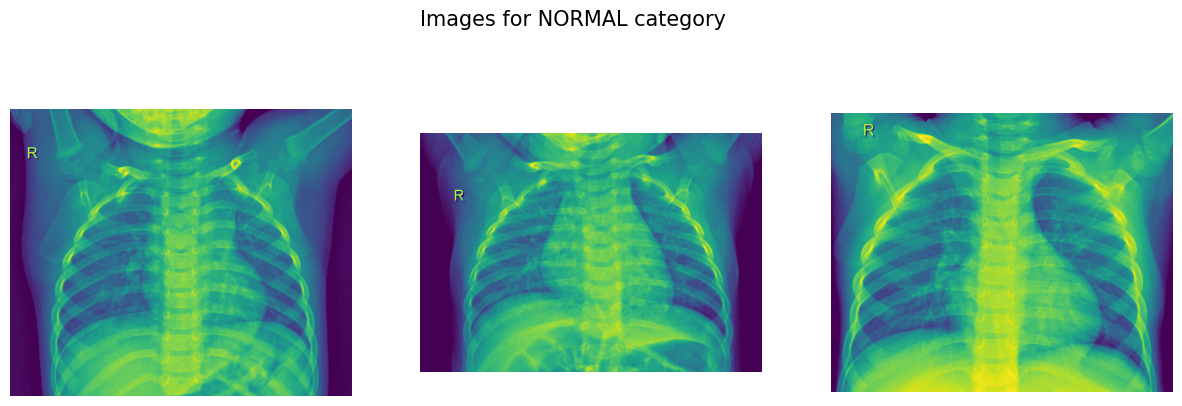

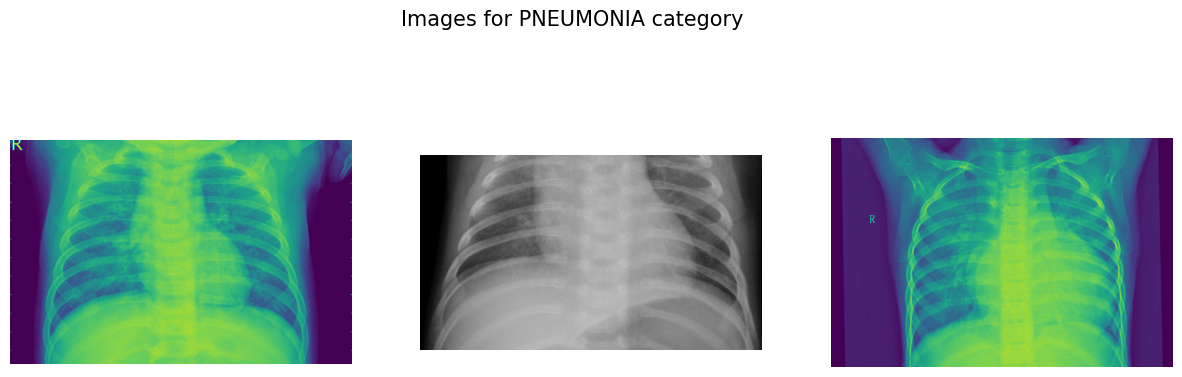

In [4]:
# Load data to view sample images
path = train_path
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=15)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

### 3.3.3. Visualize Class Distribution

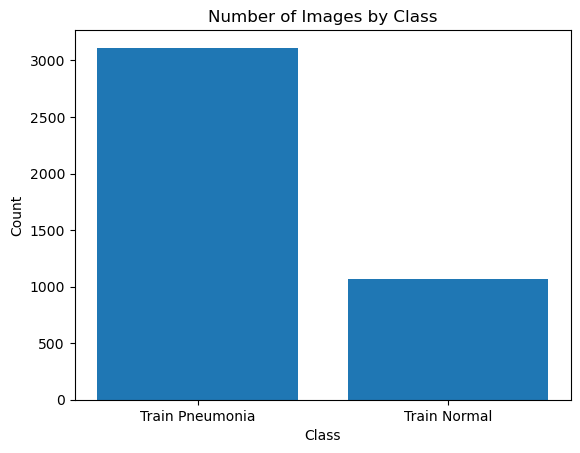

In [5]:
# Path to class pneumonia 
pneu_train_path = '/home/munyao/Desktop/deku/chest_data/train/PNEUMONIA'
# Path to class normal
norm_train_path = '/home/munyao/Desktop/deku/chest_data/train/NORMAL'

# Get the class distribution
number_classes = {'Train Pneumonia': len(os.listdir(pneu_train_path)),
                  'Train Normal': len(os.listdir(norm_train_path))}

plt.bar(number_classes.keys(), number_classes.values())
plt.title("Number of Images by Class")
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

# 4. DATA PREPROCESSING
* The batch size 32 defines the number of samples that will be propagated through the neural network at once. 

* The image dimensions 224X224 define the size of the input images that will be fed into the network.

* The ImageDataGenerator object is used to augment the training data, which is important for improving the generalization of the model. Data augmentation helps to artificially increase the size of the training set by creating new training samples from the existing ones. This is achieved by applying various transformations such as rotations, shifts, flips, etc. to the original images.

* The rescale parameter is used to normalize the pixel values of the images by dividing them by 255, which scales them to the range of [0,1].

* The rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, and horizontal_flip parameters are used to define the range and types of augmentations that will be applied to the images during training.

* The fill_mode parameter specifies the method used for filling in any missing pixels that may occur during the image transformations.

* Overall, data augmentation is an important technique for improving the performance of neural networks by providing them with a more diverse training set.


## 4.1. Data Augmentation 

In [6]:
# Define the batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Define the paths to the training and validation directories
train_dir = train_path
val_dir = val_path
test_dir = test_path

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create an ImageDataGenerator object for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create a validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create an ImageDataGenerator object for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 4177 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 5. MODELING
The model used is VGG16. It is a strong model for pneumonia classification due to its high performance, pre-trained nature, and availability of pre-trained weights. It can serve as a powerful tool for medical image analysis and can help to improve the accuracy and efficiency of your classification system. 

The VGG16 model is a good choice for pneumonia classification because it has already been pre-trained on a large and diverse dataset of natural images, which helps it learn useful features for image classification tasks. The addition of the extra layers fine-tunes the model for the specific task of pneumonia classification, while still leveraging the pre-trained feature.

## 5.1.  VGG16 Model Develpment
The VGG16 architecture is characterized by its deep convolutional layers, with 13 convolutional layers and 5 max-pooling layers. It also includes three fully connected layers at the end of the network. This architecture is known for its simplicity and effectiveness in image classification tasks.

The model has been fine-tuned for the specific task of pneumonia classification, by adding a few additional trainable layers on top of the pre-trained VGG16 model. These layers include a flatten layer, a dense layer with 256 units and ReLU activation, a dropout layer with a rate of 0.5, and a final dense layer with a sigmoid activation to output the binary classification prediction. 

The model is trained using binary cross-entropy loss and the Adam optimizer, and includes additional metrics to monitor its performance during training and evaluation.


### 5.1.1. Model Architecture

In [9]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new trainable layers
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall(), f1_score])


### 5.1.2 Model Summary
The first layer, vgg16 (Functional), is the pre-trained VGG16 model with its layers frozen. The output shape of this layer is (None, 7, 7, 512), which means that the output of the pre-trained model has a shape of (batch_size, 7, 7, 512), where batch_size is the number of images in each batch.

The second layer, flatten_6 (Flatten), flattens the output from the pre-trained model into a 1-dimensional feature vector with a shape of (None, 25088).

The third layer, dense_14 (Dense), is a fully connected layer with 256 units and ReLU activation. This layer has 6,422,784 trainable parameters.

The fourth layer, dropout_8 (Dropout), is a dropout layer with a rate of 0.5, which means that half of the output units will be randomly set to 0 during training to prevent overfitting.

The fifth layer, dense_15 (Dense), is a fully connected layer with a single unit and sigmoid activation. This layer has 257 trainable parameters.

The printed summary also shows the total number of parameters in the model, which is 21,137,729. All of these parameters are trainable, since the pre-trained VGG16 model is fine-tuned alongside the additional layers.

In [8]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


### 5.1.3 Train Model on 25% of Data

In [ ]:
# Create a validation data generator
train_generator_25 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        sample_frac=0.25)

# Create a validation data generator
val_generator_25 = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    sample_frac=0.25)

# Train Model on 25% of data
history = model.fit(
    train_generator_25,
    epochs=10,
    validation_data=val_generator_25)


## 5.2. Model Tuning

In [ ]:
# Import relevant libraries
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.metrics import Metric
from sklearn.metrics import f1_score
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Define hyperparameters to experiment with
learning_rates = [0.1, 0.01, 0.001, 0.0001]
optimizers = ['adam', 'RMSprop', 'SGD']
batch_sizes = [16, 32, 64]

# Define custom f1_score metric
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + 1e-7))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define hypermodel for Keras Tuner
class PneumoniaClassifierHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        # Load the pre-trained VGG16 model
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=self.input_shape)

        # Add new trainable layers
        model = Sequential()
        model.add(base_model)
        model.add(Flatten())

        # Tune hyperparameters for dense layer
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                        activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu')))
        model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(units=1, activation='sigmoid'))

        # Tune hyperparameters for optimizer
        optimizer = hp.Choice('optimizer', values=optimizers)
        learning_rate = hp.Choice('learning_rate', values=learning_rates)
        if optimizer == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer == 'RMSprop':
            optimizer = RMSprop(learning_rate=learning_rate)
        elif optimizer == 'SGD':
            optimizer = SGD(learning_rate=learning_rate)

        # Compile the model with additional metrics
        model.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy', Precision(), Recall(), F1Score()])

        return model

# Define hypermodel instance
hypermodel = PneumoniaClassifierHyperModel(input_shape=(img_height, img_width, 3))

# Define tuner instance
tuner = RandomSearch(hypermodel,
                     objective='val_f1_score',
                     max_trials=10,
                     executions_per_trial=3,
                     directory='tuner_results',


# 6. EVALUATION
* **Precision:** the proportion of true positive predictions out of all positive predictions. Precision is useful when you want to minimize false positive predictions, such as in fraud detection or medical diagnoses.
* **Recall:** the proportion of true positive predictions out of all actual positive cases. Recall is useful when you want to minimize false negative predictions, such as in disease detection or product recommendations.
* **F1-score:** the harmonic mean of precision and recall. The F1-score provides a single score that balances the importance of precision and recall, and is useful when you want to evaluate overall model performance across both false positive and false negative predictions.
* **AUC-ROC:** the area under the receiver operating characteristic (ROC) curve, which measures the trade-off between true positive rate (recall) and false positive rate (1 - specificity) for different classification thresholds. AUC-ROC is useful when you want to evaluate overall model performance across different classification thresholds.

## 6.1. Model Evaluation Using Test Data

# DEPLOYMENT